# Preparación de datos
## Importar bibliotecas

In [1]:
# Define the Imports 
try:
    import os
    import json
    import math
    import pandas as pd
    from datetime import date, time
    import numpy as np
    import pyarrow as pa
    import pyarrow.parquet as pq
   
    import dask  
    import dask.dataframe as dd
    import dask.array as da

    from dask.distributed import Client, LocalCluster
    import dask.multiprocessing
    import warnings
    # Grádica
    import matplotlib.pyplot as plt
    import seaborn as sns
    import plotly.express as px
    from IPython.display import Image, display

    # Filtrar los warnings
    #warnings.filterwarnings("ignore", category=FutureWarning)
    # Restaurar el comportamiento predeterminado de los warnings después de ejecutar tu código
    #warnings.filterwarnings("default", category=FutureWarning)

except Exception as e:
    print("Some Modules are Missing : {} ".format(e))

In [2]:
# from os import listdir
# from os.path import isfile, join
#fhvhv_tripdata_2022-01.parquet
## https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page <br> oks
# Configurar el clúster de Dask
cluster = LocalCluster(n_workers=2, threads_per_worker=1, memory_limit='12GB')
client = Client(cluster)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 2
Total threads: 2,Total memory: 22.35 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:50130,Workers: 2
Dashboard: http://127.0.0.1:8787/status,Total threads: 2
Started: Just now,Total memory: 22.35 GiB
Comm: tcp://127.0.0.1:50144,Total threads: 1
Dashboard: http://127.0.0.1:50145/status,Memory: 11.18 GiB
Nanny: tcp://127.0.0.1:50133,


In [3]:
import os
import dask.dataframe as dd

# Obtener la lista de archivos Parquet procesados en el directorio
directorio = "../datasets/processed/ffvh_analys/"
archivos_procesados = [os.path.join(directorio, f) for f in os.listdir(directorio) if f.endswith('.parquet')]

# Leer y concatenar los archivos Parquet procesados
df_procesado = None
for archivo in archivos_procesados:
    if df_procesado is None:
        df_procesado = dd.read_parquet(archivo, engine='pyarrow')
    else:
        df_procesado_nuevo = dd.read_parquet(archivo, engine='pyarrow')
        df_procesado = dd.concat([df_procesado, df_procesado_nuevo])

In [4]:
# Verificar el esquema del DataFrame concatenado
print("Esquema del DataFrame concatenado:")
print(df_procesado.dtypes)

Esquema del DataFrame concatenado:
hvfhs_license_num       string[pyarrow]
dispatching_base_num    string[pyarrow]
request_datetime         datetime64[us]
on_scene_datetime        datetime64[us]
pickup_datetime          datetime64[us]
dropoff_datetime         datetime64[us]
PULocationID                      int64
DOLocationID                      int64
trip_miles                      float64
trip_time                         int64
base_passenger_fare             float64
duracion_viaje                  float64
duracion_atencion               float64
total_amount                    float64
dtype: object


In [5]:
# Verificar valores nulos y sumarlos para cada columna
null_counts = df_procesado.isnull().sum().compute()
null_counts

hvfhs_license_num       0
dispatching_base_num    0
request_datetime        0
on_scene_datetime       0
pickup_datetime         0
dropoff_datetime        0
PULocationID            0
DOLocationID            0
trip_miles              0
trip_time               0
base_passenger_fare     0
duracion_viaje          0
duracion_atencion       0
total_amount            0
dtype: int64

In [5]:
type(df_procesado)

dask_expr._collection.DataFrame

In [24]:
df_procesado.head()

,hvfhs_license_num,dispatching_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,duracion_viaje,duracion_atencion,total_amount
0,HV0003,B03404,2022-01-01 00:05:31,2022-01-01 00:05:40,2022-01-01 00:07:24,2022-01-01 00:18:28,170,161,1.18,664,24.90,664.0,9.0,53.64
1,HV0003,B03404,2022-01-01 00:19:27,2022-01-01 00:22:08,2022-01-01 00:22:32,2022-01-01 00:30:12,237,161,0.82,460,11.97,460.0,161.0,28.46
2,HV0003,B03404,2022-01-01 00:43:53,2022-01-01 00:57:37,2022-01-01 00:57:37,2022-01-01 01:07:32,237,161,1.18,595,29.82,595.0,824.0,59.41
3,HV0003,B03404,2022-01-01 00:15:36,2022-01-01 00:17:08,2022-01-01 00:18:02,2022-01-01 00:23:05,262,229,1.65,303,7.91,303.0,92.0,17.90
4,HV0003,B03404,2022-01-01 00:25:45,2022-01-01 00:26:01,2022-01-01 00:28:01,2022-01-01 00:35:42,229,141,1.65,461,9.44,461.0,16.0,20.75


In [5]:
# Definir una función auxiliar para verificar si una columna es numérica
def is_numeric_dtype(column):
    return column.dtype in [int, float,'int64']

# Obtener solo las columnas numéricas
numeric_columns = [col_name for col_name in df_procesado.columns if is_numeric_dtype(df_procesado[col_name])]

# Convertir la selección de columnas en una operación lazy
lazy_select = df_procesado[numeric_columns]

# Calcular estadísticas descriptivas solo para las columnas numéricas de manera lazy
lazy_stats = lazy_select.describe()

# Ejecutar la operación lazy para obtener los resultados
#stats_result = lazy_stats.compute()

In [6]:
lazy_stats

,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,duracion_viaje,duracion_atencion,total_amount
npartitions=1,,,,,,,,
,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...


In [7]:
# Formatear el DataFrame de estadísticas descriptivas para hacerlo más legible
formatted_stats_df = lazy_stats.compute().applymap(lambda x: f"{x:,.2f}" if isinstance(x, (int, float)) else x)

# Imprimir el DataFrame formateado
formatted_stats_df

C:\Users\ozi\AppData\Local\Temp\ipykernel_1404\791640754.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_stats_df = lazy_stats.compute().applymap(lambda x: f"{x:,.2f}" if isinstance(x, (int, float)) else x)


,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,duracion_viaje,duracion_atencion,total_amount
count,"10,669,658.00","10,669,658.00","10,669,658.00","10,669,658.00","10,669,658.00","10,669,658.00","10,669,658.00","10,669,658.00"
mean,138.84,142.06,4.54,"1,008.50",19.56,"1,008.44",192.01,40.57
std,75.60,77.87,5.21,686.18,15.42,686.10,159.67,31.74
min,2.00,1.00,0.00,1.00,-348.61,1.00,0.00,-40.67
25%,75.00,76.00,1.52,563.00,11.06,563.00,107.00,22.11
50%,141.00,143.00,2.80,884.00,17.33,884.00,187.00,34.69
75%,212.00,220.00,5.77,"1,379.00",26.31,"1,379.00",310.00,54.21
max,265.00,265.00,440.71,"147,918.00","4,995.96","147,918.00","33,013.00","10,293.29"


In [8]:
def obtener_valores_unicos(df_dask, columna):
    # Seleccionar la columna especificada
    columna_serie = df_dask[columna]
    
    # Obtener los valores únicos de la columna
    valores_unicos = columna_serie.unique().compute()
 
    return valores_unicos

In [9]:
# Usar la función para obtener los valores únicos de la columna 'hvfhs_license_num'
valores_unicos_hvfhs_license_num = obtener_valores_unicos(df_procesado, 'hvfhs_license_num')
# Imprimir los valores únicos
print(valores_unicos_hvfhs_license_num)

0    HV0003
1    HV0005
Name: hvfhs_license_num, dtype: string


In [10]:
# Usar la función para obtener los valores únicos de la columna 'hvfhs_license_num'
valores_unicos_dispatching_base_num = obtener_valores_unicos(df_procesado, 'dispatching_base_num')
# Imprimir los valores únicos
valores_unicos_dispatching_base_num

0    B02395
1    B02878
2    B02872
3    B02765
4    B02870
5    B02880
6    B02887
7    B02875
0    B02867
1    B02879
2    B02864
3    B02882
4    B02876
5    B02877
6    B02682
7    B02835
0    B03404
1    B02889
2    B02512
3    B02869
4    B02884
0    B02764
1    B03406
2    B02617
3    B02888
4    B02866
5    B02871
6    B02883
Name: dispatching_base_num, dtype: string

In [51]:
"""
# 1. Convertir las columnas numéricas en un array Dask
numeric_columns = [col_name for col_name in df_procesado.columns if is_numeric_dtype(df_procesado[col_name])]
numeric_array = df_procesado[numeric_columns].to_dask_array(lengths=True)

# 2. Reajustar los bloques para optimizar el procesamiento paralelo
input_chunks = (60,) * len(numeric_columns)  # Tamaño de los bloques de entrada
output_chunks = (-1,) * len(numeric_columns)  # Tamaño de los bloques de salida

numeric_array = numeric_array.rechunk(input_chunks)

#######
# Seleccionar solo la columna 'total_amount' del DataFrame de Dask
column_total_amount = df_procesado['total_amount']

# Convertir la columna en un array Dask
total_amount_array = column_total_amount.to_dask_array(lengths=True)

# Reajustar los bloques para optimizar el procesamiento paralelo
total_amount_array = total_amount_array.rechunk(input_chunks)
"""

In [6]:
def get_sample_values(column, sample_size):
    """
    Obtiene una muestra aleatoria de una columna de un DataFrame de Dask.

    Parameters:
    - column (dask.dataframe.Series): La columna de un DataFrame de Dask.
    - sample_size (float): El tamaño de la muestra como un porcentaje decimal (0-1).

    Returns:
    - pd.Series: Una serie de Pandas que contiene la muestra aleatoria.
    """
    sample_values = column.sample(frac=sample_size).compute()
    return sample_values

In [7]:
sample_size = 0.9
# Suponiendo que ya tienes el DataFrame de Dask df_procesado y deseas obtener la serie 'total_amount'
column_total_amount = df_procesado['total_amount']
sample_series = get_sample_values(column_total_amount, sample_size)

In [8]:
type(sample_series)

pandas.core.series.Series

In [10]:
sample_series

3365826      49.36
2456083      72.18
765551       15.83
2558178      19.19
3357007      15.88
             ...  
12025622     78.10
14204678    166.33
13719053     47.18
13109977     78.65
11079357     20.85
Name: total_amount, Length: 1066967, dtype: float64

In [15]:
def boxplot_visualization(serie, filename, theme='plotly'):
    """
    Crea un gráfico de boxplot interactivo para visualizar la distribución de una serie numérica.

    Parameters:
    - serie (pd.Series): La serie que contiene los datos.
    - filename (str): El nombre del archivo de imagen donde se guardará el gráfico.
    - theme (str, optional): El tema del gráfico. Puede ser 'plotly', 'ggplot2', 'seaborn', 'simple_white', entre otros.
                             Por defecto, es 'plotly'.

    Returns:
    None
    """
    fig = px.box(serie, y=serie.name, labels={serie.name: 'Valores'},
                 title=f'Distribución de valores en la serie "{serie.name}"',
                 template=theme)
    image_path = f'../vis/{filename}.png'
    fig.write_image(image_path)

    display(Image(filename=image_path))


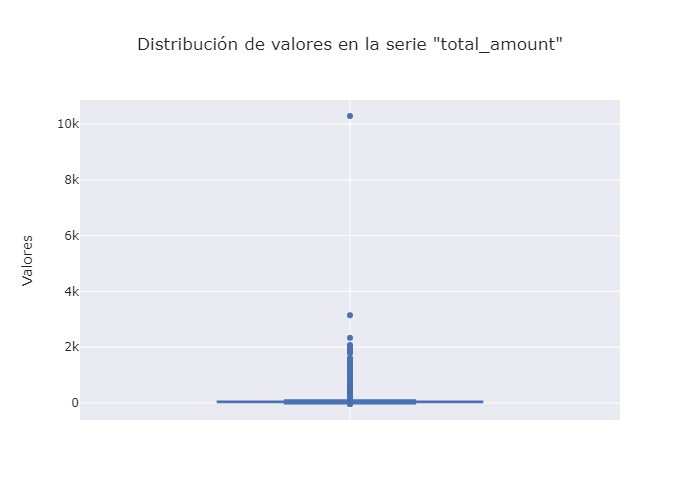

In [16]:
boxplot_visualization(sample_series, 'boxplot_example', theme='seaborn')

In [18]:
# Obtener la cantidad de registros en la variable 'sample_series'
cantidad_registros = len(sample_series)
print("Cantidad de registros en sample_series:", cantidad_registros)
# Contar cuántos valores son negativos
num_negativos = (sample_series < 0).sum()

# Contar cuántos valores están por encima de 293.29
num_mayores_293_29 = (sample_series > 293.29).sum()

print("Cantidad de valores negativos:", num_negativos)
print("Cantidad de valores por encima de 293.29:", num_mayores_293_29)

Cantidad de registros en sample_series: 9602692
Cantidad de valores negativos: 133
Cantidad de valores por encima de 293.29: 9478


In [19]:
def histogram_visualization(serie, filename, theme='plotly'):
    """
    Crea un histograma interactivo para visualizar la distribución de valores en una serie.

    Parameters:
    - serie (pd.Series): La serie que contiene los datos.
    - filename (str): El nombre del archivo de imagen donde se guardará el gráfico.
    - theme (str, optional): El tema del gráfico. Puede ser 'plotly', 'ggplot2', 'seaborn', 'simple_white', entre otros.
                             Por defecto, es 'plotly'.

    Returns:
    None
    """
    fig = px.histogram(serie, x=serie.name, nbins=20,
                       labels={serie.name: 'Valores', 'count': 'Frecuencia'},
                       title=f'Distribución de valores en la serie "{serie.name}"',
                       template=theme)
    image_path = f'../vis/{filename}.png'
    fig.write_image(image_path)

    display(Image(filename=image_path))

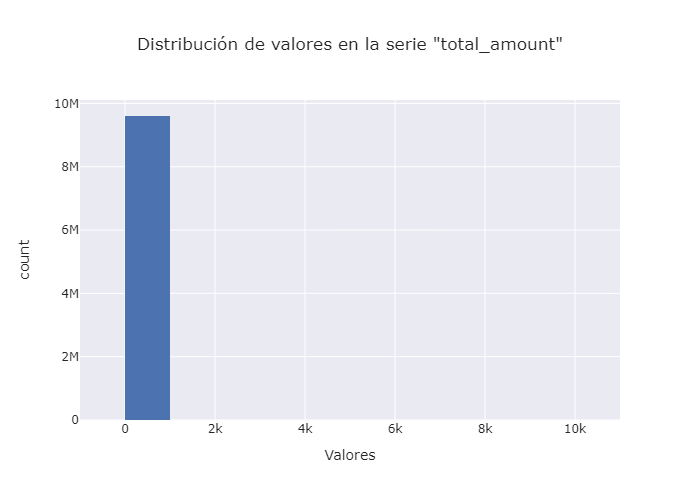

In [20]:
# Llamar a la función barplot_visualization con la serie de ejemplo
histogram_visualization(sample_series, 'histogram_example', theme='seaborn')

In [21]:
# Verificar el esquema del DataFrame concatenado
print("Esquema del DataFrame concatenado:")
print(df_procesado.dtypes)

Esquema del DataFrame concatenado:
hvfhs_license_num       string[pyarrow]
dispatching_base_num    string[pyarrow]
request_datetime         datetime64[us]
on_scene_datetime        datetime64[us]
pickup_datetime          datetime64[us]
dropoff_datetime         datetime64[us]
PULocationID                      int64
DOLocationID                      int64
trip_miles                      float64
trip_time                         int64
base_passenger_fare             float64
duracion_viaje                  float64
duracion_atencion               float64
total_amount                    float64
dtype: object


In [5]:
# Convertir el DataFrame de Dask a un DataFrame de pandas
df_pandas = df_procesado.compute()

# Definir el tamaño de la muestra
sample_fraction = 0.1  # Por ejemplo, tomemos el 10% de los datos

# Obtener una muestra del DataFrame original
df_muestra = df_procesado.sample(frac=sample_fraction, random_state=42)

# Convertir el DataFrame de Dask a un DataFrame de Pandas
df_muestra_pd = df_muestra.compute()

# Convertir el DataFrame de pandas a un DataFrame de Dask
ddf_muestra = dd.from_pandas(df_muestra_pd, npartitions=4)


In [6]:
type(ddf_muestra)

dask_expr._collection.DataFrame

C:\Users\ozi\AppData\Local\Programs\Python\Python310\lib\site-packages\dask\base.py:1462: UserWarning:

Running on a single-machine scheduler when a distributed client is active might lead to unexpected results.



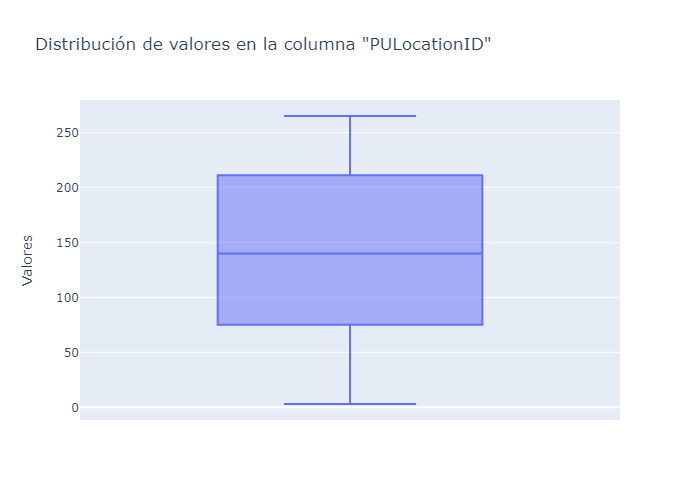

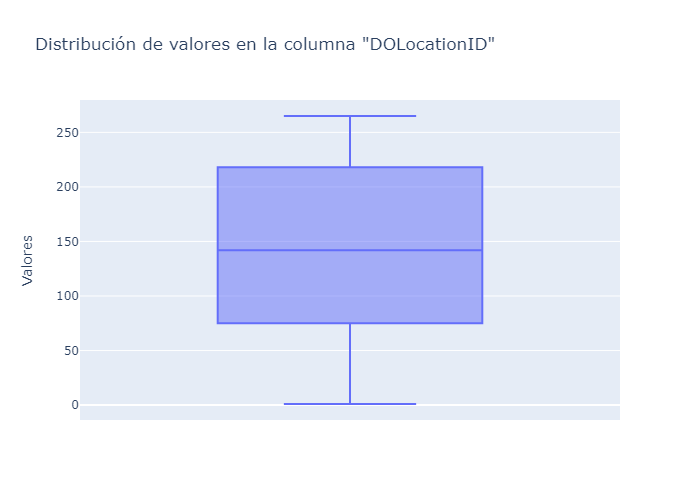

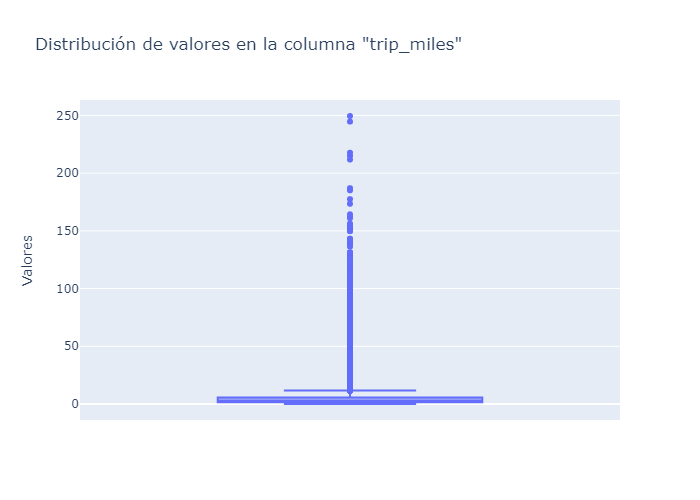

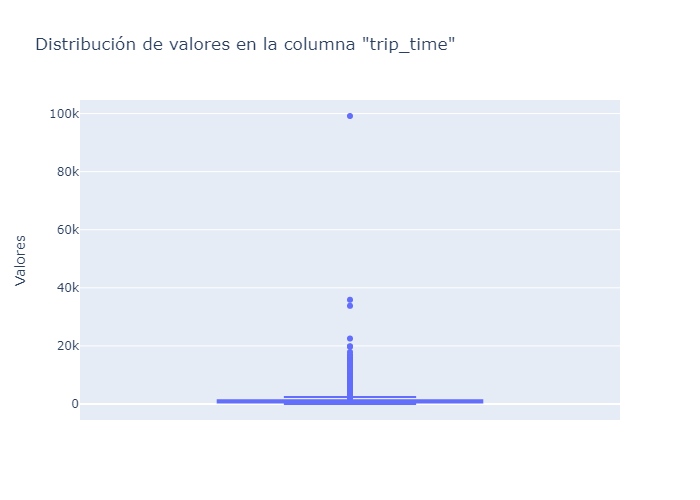

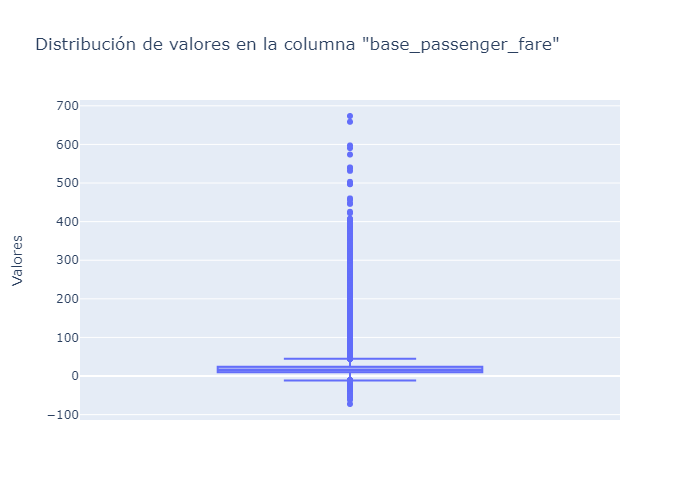

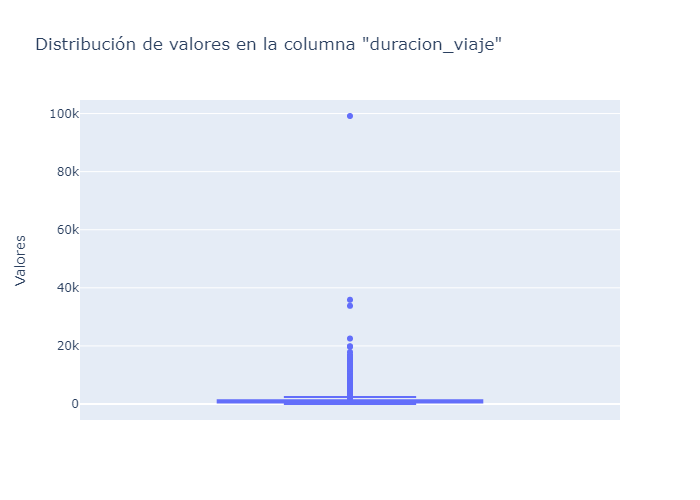

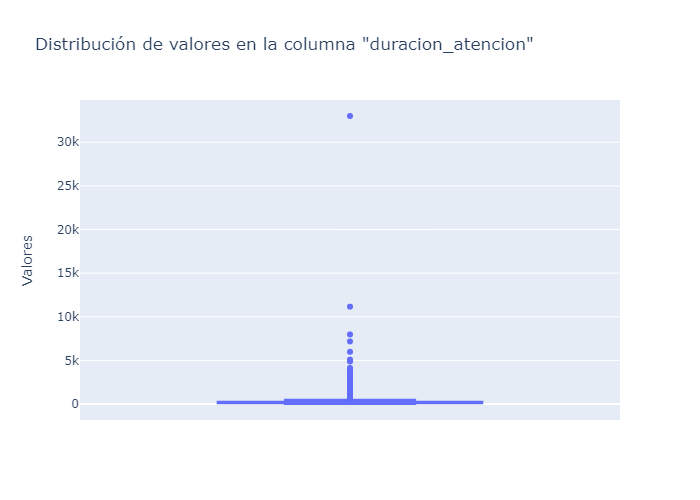

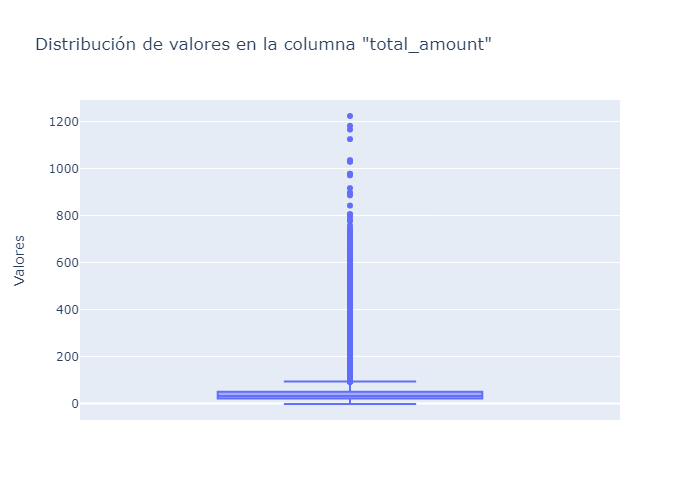

In [31]:
import plotly.express as px
from IPython.display import Image, display
import dask

@dask.delayed
def create_boxplot(dataframe, column, filename_prefix, theme='plotly'):
    fig = px.box(dataframe, y=column, labels={column: 'Valores'},
                 title=f'Distribución de valores en la columna "{column}"',
                 template=theme)
    image_path = f'../vis/{filename_prefix}_{column}.png'
    fig.write_image(image_path)
    return image_path

def boxplot_visualization(dataframe, columns, filename_prefix, theme='plotly'):
    """
    Crea gráficos de boxplot interactivos para visualizar la distribución de variables numéricas específicas en un DataFrame.

    Parameters:
    - dataframe (pd.DataFrame): El DataFrame que contiene los datos.
    - columns (list): Lista de nombres de columnas numéricas que se desean visualizar.
    - filename_prefix (str): El prefijo para el nombre del archivo de imagen donde se guardarán los gráficos.
    - theme (str, optional): El tema del gráfico. Puede ser 'plotly', 'ggplot2', 'seaborn', 'simple_white', entre otros.
                             Por defecto, es 'plotly'.

    Returns:
    None
    """
    tasks = []
    for column in columns:
        task = create_boxplot(dataframe, column, filename_prefix, theme)
        tasks.append(task)

    image_paths = dask.compute(*tasks, scheduler='threads')

    for image_path in image_paths:
        display(Image(filename=image_path))

# Utilizar la función para plotear las columnas numéricas específicas del DataFrame
boxplot_visualization(ddf_muestra, ddf_muestra.select_dtypes(include=['number']).columns, 'boxplot_selected_variables')

In [32]:
# 5. Cerrar el clúster de Dask
#client.close()
#cluster.close()

C:\Users\ozi\AppData\Local\Programs\Python\Python310\lib\site-packages\dask\base.py:1462: UserWarning: Running on a single-machine scheduler when a distributed client is active might lead to unexpected results.
  warnings.warn(


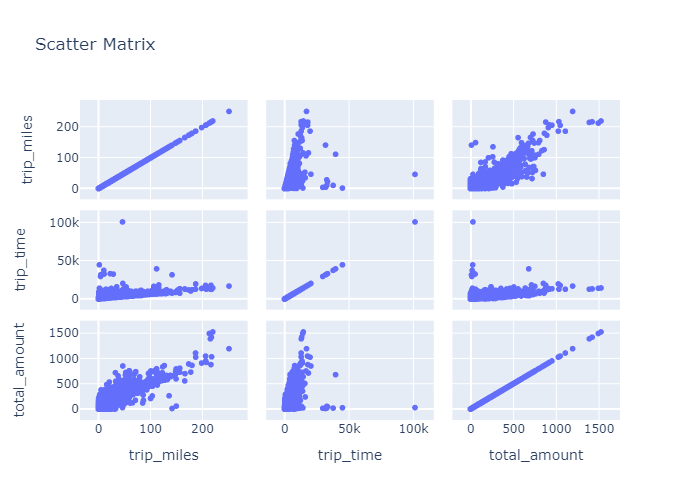

In [8]:
@dask.delayed
def create_visualization(dataframe, visualization_type, columns, filename_prefix, theme='plotly'):
    if visualization_type == 'boxplot':
        fig = px.box(dataframe, y=columns, labels={col: 'Valores' for col in columns},
                     title=f'Distribución de valores en las columnas {", ".join(columns)}',
                     template=theme)
    elif visualization_type == 'scatter_matrix':
        fig = px.scatter_matrix(dataframe[columns], dimensions=columns, title='Scatter Matrix',
                                template=theme)
    else:
        raise ValueError("Tipo de visualización no válido. Debe ser 'boxplot' o 'scatter_matrix'.")
    
    image_path = f'../vis/{filename_prefix}_{visualization_type}.png'
    fig.write_image(image_path)
    return image_path

def visualize_data(dataframe, visualization_type, columns, filename_prefix, theme='plotly'):
    """
    Crea visualizaciones interactivas para un DataFrame.

    Parameters:
    - dataframe (pd.DataFrame): El DataFrame que contiene los datos.
    - visualization_type (str): El tipo de visualización. Puede ser 'boxplot' o 'scatter_matrix'.
    - columns (list): Lista de nombres de columnas para visualizar.
    - filename_prefix (str): El prefijo para el nombre del archivo de imagen donde se guardarán los gráficos.
    - theme (str, optional): El tema del gráfico. Puede ser 'plotly', 'ggplot2', 'seaborn', 'simple_white', entre otros.
                             Por defecto, es 'plotly'.

    Returns:
    None
    """
    tasks = []
    for col_set in columns:
        task = create_visualization(dataframe, visualization_type, col_set, filename_prefix, theme)
        tasks.append(task)

    image_paths = dask.compute(*tasks, scheduler='threads')

    for image_path in image_paths:
        display(Image(filename=image_path))

# Ejemplo de uso para crear un scatter matrix
visualize_data(ddf_muestra, 'scatter_matrix', [['trip_miles', 'trip_time', 'total_amount']], 'scatter_matrix_visualization')


In [9]:
# 5. Cerrar el clúster de Dask
client.close()
cluster.close()